## Uncleaned Laptop Price dataset Task -Preprocessing 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
# Load the dataset
df = pd.read_csv("C:/Users/bbuser/Desktop/DataScience-Brain-Bytes/Team_members/from_alzahra/data/laptopData.csv")

#### Initial Data Inspection -Examine the structure and basic information about our dataset.-

In [80]:
print("=== First 5 Rows ===")
print(df.head())
print("\n=== Dataset Info ===")
print(df.info())

=== First 5 Rows ===
   Unnamed: 0 Company   TypeName Inches                    ScreenResolution  \
0         0.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1         1.0   Apple  Ultrabook   13.3                            1440x900   
2         2.0      HP   Notebook   15.6                   Full HD 1920x1080   
3         3.0   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4         4.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD G

In [81]:
#Check ALL column names in the DataFrame
print("All columns in the DataFrame:")
print(df.columns.tolist())

All columns in the DataFrame:
['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']


In [82]:
# Check for missing values
print(df.isnull().sum())
#From the output Below its show that Their is  missing values in some columns

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


#### Handle Missing Values- Standardize Weight Column Format (Even with no missing values, we ensure consistent numeric formatting)

In [83]:
# Convert all weight values to lowercase strings to handle case variations (e.g., "KG" vs "kg")
df['Weight'] = df['Weight'].astype(str).str.lower()

# Remove non-numeric characters (units, symbols) except decimal points to isolate the numeric value
# Example: "1.37kg" → "1.37", "2,5" → "2.5"
df['Weight'] = df['Weight'].str.replace('[^0-9.]', '', regex=True)

# Convert to numeric, coercing invalid entries (like empty strings) to NaN 
# (though none exist here, this safeguards against future data)
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Fill any hypothetical NaN values with the median weight 
# (though current data has none, this ensures robustness)
df['Weight'] = df['Weight'].fillna(df['Weight'].median())

# Verify cleanup: Show first 5 values and summary statistics
print("Cleaned Weight Column (Sample):")
print(df['Weight'].head())
print("\nSummary Statistics:")
print(df['Weight'].describe())

Cleaned Weight Column (Sample):
0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: float64

Summary Statistics:
count    1303.000000
mean        2.076723
std         0.798154
min         0.000200
25%         1.540000
50%         2.040000
75%         2.310000
max        11.100000
Name: Weight, dtype: float64


In [84]:
df.describe()

,Unnamed: 0,Weight,Price
count,1273.000000,1303.000000,1273.000000
mean,652.674784,2.076723,59955.814073
std,376.493027,0.798154,37332.251005
min,0.000000,0.000200,9270.720000
25%,327.000000,1.540000,31914.720000
50%,652.000000,2.040000,52161.120000
75%,980.000000,2.310000,79333.387200
max,1302.000000,11.100000,324954.720000


In [85]:
# Clean the 'price' column (ensure numeric)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#Verify numeric columns
print("Weight summary:")
print(df['Weight'].describe())
print("\nPrice summary:")
print(df['Price'].describe())

Weight summary:
count    1303.000000
mean        2.076723
std         0.798154
min         0.000200
25%         1.540000
50%         2.040000
75%         2.310000
max        11.100000
Name: Weight, dtype: float64

Price summary:
count      1273.000000
mean      59955.814073
std       37332.251005
min        9270.720000
25%       31914.720000
50%       52161.120000
75%       79333.387200
max      324954.720000
Name: Price, dtype: float64


#### Extract Key Features from Text Columns

In [86]:
#Extract CPU speed (GHz) from 'cpu' column
df['cpu_speed'] = (
    df['Cpu']
    .str.extract(r'(\d+\.\d+)GHz')[0]  # Capture digits before "GHz"
    .astype(float)                     # Convert to float
)

#Extract GPU brand (Nvidia/AMD/Intel) from 'gpu' column
df['gpu_brand'] = df['Gpu'].str.split().str[0]

# 6.3 Verify new features
print("\nCPU Speed samples:")
print(df['cpu_speed'].head())
print("\nGPU Brand counts:")
print(df['gpu_brand'].value_counts())


CPU Speed samples:
0    2.3
1    1.8
2    2.5
3    2.7
4    3.1
Name: cpu_speed, dtype: float64

GPU Brand counts:
gpu_brand
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64


In [87]:
print("Columns in DataFrame:", df.columns.tolist())

Columns in DataFrame: ['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'cpu_speed', 'gpu_brand']


In [88]:
#Check ALL column names in the DataFrame After Updates and add new coulmns
print("All columns in the DataFrame:")
print(df.columns.tolist())

All columns in the DataFrame:
['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'cpu_speed', 'gpu_brand']


#### Handle Categorical Variables (Convert text categories like company, typename into machine-readable formats)

In [89]:
# Clean categorical columns
cat_cols = ['Company', 'TypeName', 'OpSys']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

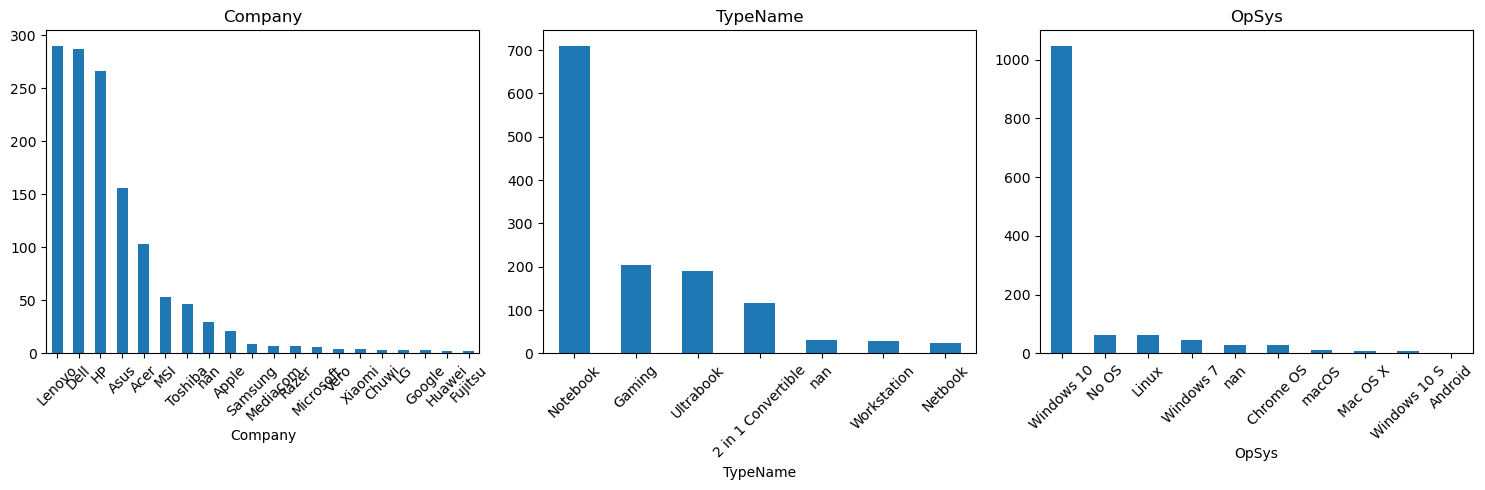

In [90]:
# Plot 4: Categorical columns distribution
plt.figure(figsize=(15,5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, len(cat_cols), i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
# One-hot encode TypeName
if 'TypeName' in df.columns:
    df = pd.get_dummies(df, columns=['TypeName'], prefix='type')

In [92]:
# Label encode Company
if 'Company' in df.columns:
    le = LabelEncoder()
    df['Company_Code'] = le.fit_transform(df['Company'])

In [94]:
# Step 1: Handle missing values in 'Ram'
# Remove 'GB' and convert to numeric (with errors='coerce' to convert bad values to NaN)
df['Ram'] = df['Ram'].str.replace('GB', '', regex=False)
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')

# Drop rows where 'Ram' is still NaN (or you can choose to fill it)
df = df.dropna(subset=['Ram'])

# Convert to integer after cleaning
df['Ram'] = df['Ram'].astype(int)

In [117]:
# Step 1: Encode categorical variables
categorical_cols = ['Company', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys', 'gpu_brand']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 2: Define features and target **from df_encoded**
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

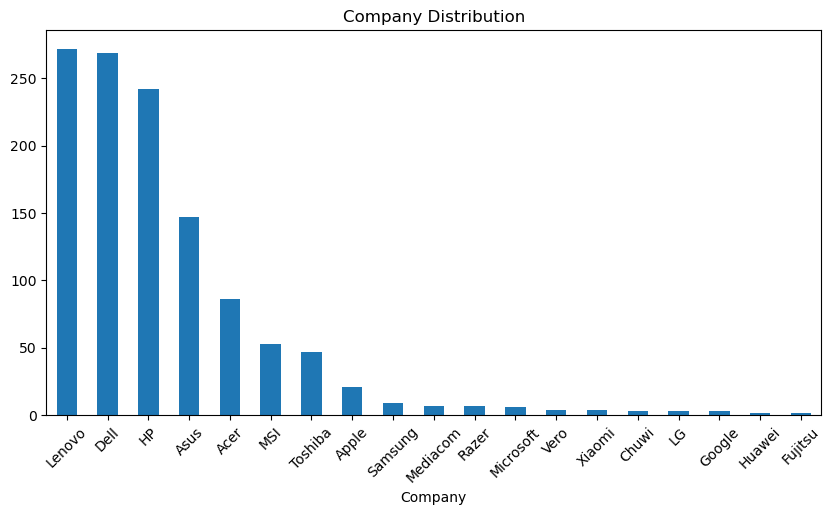

In [118]:
# Plot 5: Company distribution
plt.figure(figsize=(10,5))
df['Company'].value_counts().plot(kind='bar')
plt.title("Company Distribution")
plt.xticks(rotation=45)
plt.show()

#### Final Validation (Check data consistency before saving/analysis)

In [119]:
print("\n=== Final Missing Values ===")
print(df.isnull().sum())

print("\n=== Data Types ===")
print(df.dtypes)


=== Final Missing Values ===
Company                    0
Inches                     0
ScreenResolution           0
Cpu                        0
Ram                        0
Memory                     0
Gpu                        0
OpSys                      0
Weight                     0
Price                      0
cpu_speed                  0
gpu_brand                  0
type_2 in 1 Convertible    0
type_Gaming                0
type_Netbook               0
type_Notebook              0
type_Ultrabook             0
type_Workstation           0
type_nan                   0
Company_Code               0
dtype: int64

=== Data Types ===
Company                     object
Inches                     float64
ScreenResolution            object
Cpu                         object
Ram                          int64
Memory                      object
Gpu                         object
OpSys                       object
Weight                     float64
Price                      float64
cpu_spe

In [120]:
# Print current missing values
print("=== Current Missing Values ===")
print(df.isnull().sum())

=== Current Missing Values ===
Company                    0
Inches                     0
ScreenResolution           0
Cpu                        0
Ram                        0
Memory                     0
Gpu                        0
OpSys                      0
Weight                     0
Price                      0
cpu_speed                  0
gpu_brand                  0
type_2 in 1 Convertible    0
type_Gaming                0
type_Netbook               0
type_Notebook              0
type_Ultrabook             0
type_Workstation           0
type_nan                   0
Company_Code               0
dtype: int64


In [121]:
#Handle Categorical Columns (individual operations)
# Fill Inches with mode
df['Inches'] = df['Inches'].fillna(df['Inches'].mode()[0])

# Fill ScreenResolution with mode
df['ScreenResolution'] = df['ScreenResolution'].fillna(df['ScreenResolution'].mode()[0])

# Fill Cpu with mode
df['Cpu'] = df['Cpu'].fillna(df['Cpu'].mode()[0])

# Fill Ram with mode
df['Ram'] = df['Ram'].fillna(df['Ram'].mode()[0])

# Fill Memory with mode
df['Memory'] = df['Memory'].fillna(df['Memory'].mode()[0])

In [140]:
# Replace '?' with NaN
df = df.replace('?', pd.NA)

# Drop rows with any missing values
df = df.dropna()

# Drop 'Unnamed: 0' if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Convert types
df['Inches'] = df['Inches'].astype(float)
df['type_nan'] = df['type_nan'].astype(int)

# Clean 'Ram' if not yet done
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=False)
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')
df = df.dropna(subset=['Ram'])
df['Ram'] = df['Ram'].astype(int)

# One-hot encode object columns
categorical_cols = ['Company', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys', 'gpu_brand']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']


In [131]:
# Check if any column in X has object (string) data type
print(X.dtypes[X.dtypes == 'object'])


Company             object
ScreenResolution    object
Cpu                 object
Memory              object
Gpu                 object
OpSys               object
gpu_brand           object
dtype: object


In [132]:
# See actual unique values in any object column
for col in X.select_dtypes(include='object').columns:
    print(f"{col} → {X[col].unique()[:5]}")

Company → ['Apple' 'HP' 'Asus' 'Acer' 'Dell']
ScreenResolution → ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' 'IPS Panel Full HD 1920x1080']
Cpu → ['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz']
Memory → ['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD'
 '256GB Flash Storage']
Gpu → ['Intel Iris Plus Graphics 640' 'Intel HD Graphics 6000'
 'Intel HD Graphics 620' 'AMD Radeon Pro 455'
 'Intel Iris Plus Graphics 650']
OpSys → ['macOS' 'No OS' 'Mac OS X' 'Windows 10' 'Linux']
gpu_brand → ['Intel' 'AMD' 'Nvidia' 'ARM']


In [123]:
# Fill Gpu with mode
df['Gpu'] = df['Gpu'].fillna(df['Gpu'].mode()[0])

# Fill gpu_brand with mode
if 'gpu_brand' in df.columns:
    df['gpu_brand'] = df['gpu_brand'].fillna(df['gpu_brand'].mode()[0])

In [133]:
#Convert Boolean Columns (individual operations)
# Convert each type column to int
df['type_2 in 1 Convertible'] = df['type_2 in 1 Convertible'].astype(int)
df['type_Gaming'] = df['type_Gaming'].astype(int)
df['type_Netbook'] = df['type_Netbook'].astype(int)
df['type_Notebook'] = df['type_Notebook'].astype(int)
df['type_Ultrabook'] = df['type_Ultrabook'].astype(int)
df['type_Workstation'] = df['type_Workstation'].astype(int)

In [134]:
# FINAL VALIDATION
print("\n=== Final Missing Values ===")
print(df.isnull().sum())

print("\n=== Final Data Types ===")
print(df.dtypes)


=== Final Missing Values ===
Company                    0
Inches                     0
ScreenResolution           0
Cpu                        0
Ram                        0
Memory                     0
Gpu                        0
OpSys                      0
Weight                     0
Price                      0
cpu_speed                  0
gpu_brand                  0
type_2 in 1 Convertible    0
type_Gaming                0
type_Netbook               0
type_Notebook              0
type_Ultrabook             0
type_Workstation           0
type_nan                   0
Company_Code               0
dtype: int64

=== Final Data Types ===
Company                     object
Inches                     float64
ScreenResolution            object
Cpu                         object
Ram                          int64
Memory                      object
Gpu                         object
OpSys                       object
Weight                     float64
Price                      float64
c

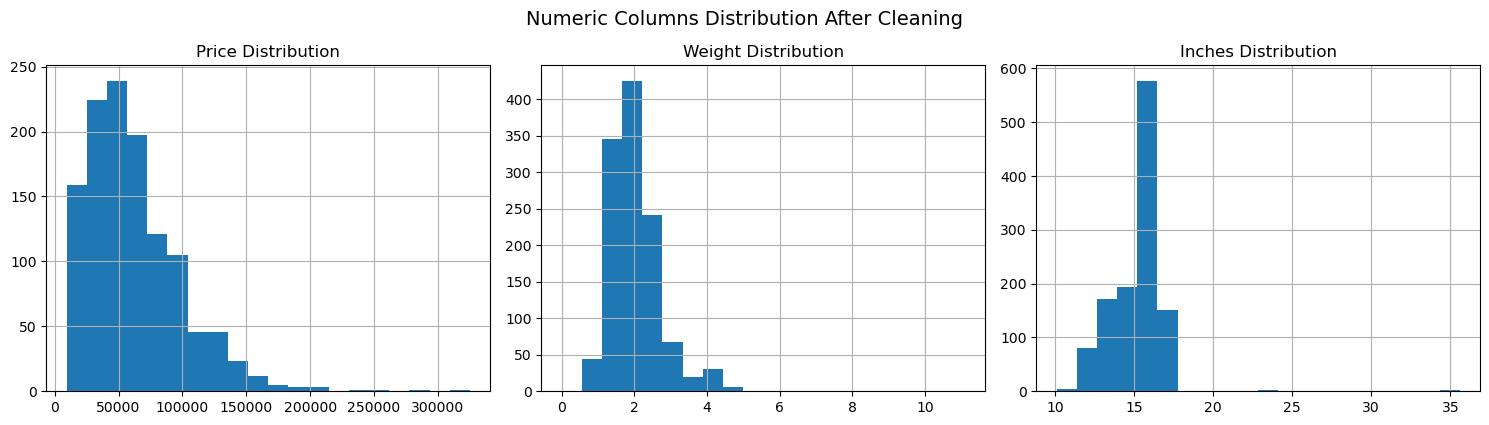

In [135]:
# Create histogram plot for specific numeric columns
plt.figure(figsize=(15, 4))  # Wider figure for better horizontal spread

# Plot each numeric column individually in subplots
plt.subplot(1, 3, 1)  # 1 row, 3 columns, position 1
df['Price'].hist(bins=20)
plt.title('Price Distribution')

plt.subplot(1, 3, 2)  # position 2
df['Weight'].hist(bins=20)
plt.title('Weight Distribution')

plt.subplot(1, 3, 3)  # position 3
df['Inches'].hist(bins=20)
plt.title('Inches Distribution')

# Adjust layout
plt.tight_layout()
plt.suptitle("Numeric Columns Distribution After Cleaning", y=1.05, fontsize=14)
plt.show()

In [136]:
print(X.dtypes)

Company                     object
Inches                     float64
ScreenResolution            object
Cpu                         object
Ram                          int64
Memory                      object
Gpu                         object
OpSys                       object
Weight                     float64
cpu_speed                  float64
gpu_brand                   object
type_2 in 1 Convertible      int64
type_Gaming                  int64
type_Netbook                 int64
type_Notebook                int64
type_Ultrabook               int64
type_Workstation             int64
type_nan                     int64
Company_Code                 int64
dtype: object


In [141]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [143]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (metrics explained later)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [144]:
print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 384045042.78
R-squared (R2): 0.71
